In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 绘制历史和未来情景下的全球平均序列图

(np.float64(-3287.0), np.float64(47846.0))

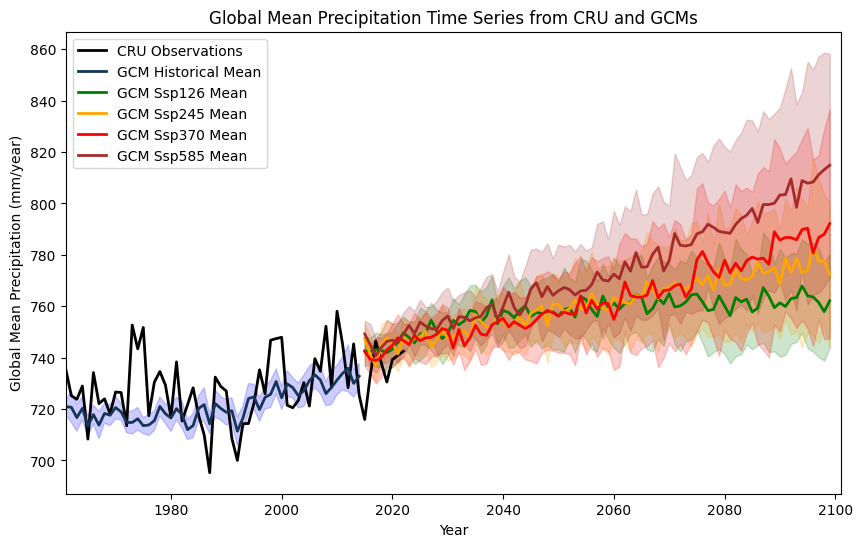

In [27]:
element = "pr"
scen_list = ["historical", "ssp126", "ssp245", "ssp370", "ssp585"]
colors_list = ['#153559', '#08A8CD', '#F39608', '#D80D1F', '#9A191D']
colors_list = ['blue', 'green', 'orange', 'red', 'brown']

all_cru_series = pd.read_csv("../data/global_mean_series/cru/cru_global_mean_series.txt", sep='\t', parse_dates=['Time'], index_col='Time')
cru_series = all_cru_series[element].resample('YS').sum()

gcm_historical = pd.read_csv(f"../data/global_mean_series/gcm/{element}/{element}_historical_global_mean_series.txt", sep='\t', parse_dates=['Time'], index_col='Time').resample('YS').sum()
gcm_historical_mean = gcm_historical.mean(axis=1)
gcm_historical_std  = gcm_historical.std(axis=1)

scale_range = 0.4

plt.figure(figsize=(10,6))
plt.plot(cru_series.index, cru_series.values, label='CRU Observations', color='black', linewidth=2)
plt.plot(gcm_historical_mean.index, gcm_historical_mean.values, label='GCM Historical Mean', color='#153559', linewidth=2)
plt.fill_between(gcm_historical_mean.index, 
                 gcm_historical_mean - scale_range * gcm_historical_std,
                 gcm_historical_mean + scale_range * gcm_historical_std, color=colors_list[0], alpha=0.2)

for i, scen in enumerate(scen_list[1:]):
    gcm_scen = pd.read_csv(f"../data/global_mean_series/gcm/{element}/{element}_{scen}_global_mean_series.txt", sep='\t', parse_dates=['Time'], index_col='Time').resample('YS').sum(min_count=1)
    gcm_scen_mean = gcm_scen.mean(axis=1)
    gcm_scen_std  = gcm_scen.std(axis=1)

    scale_range_series = np.linspace(scale_range, 1, len(gcm_scen_mean))

    plt.plot(gcm_scen_mean.index, gcm_scen_mean.values, label=f'GCM {scen.capitalize()} Mean', linewidth=2, color=colors_list[i + 1])
    plt.fill_between(gcm_scen_mean.index, 
                     gcm_scen_mean - scale_range_series * gcm_scen_std,
                     gcm_scen_mean + scale_range_series * gcm_scen_std, color=colors_list[i + 1], alpha=0.2)
    
plt.xlabel('Year')
plt.ylabel('Global Mean Precipitation (mm/year)')
plt.title('Global Mean Precipitation Time Series from CRU and GCMs')
plt.legend()
plt.xlim([pd.Timestamp('1961-01-01'), pd.Timestamp('2100-12-31')])

<Axes: xlabel='Time'>

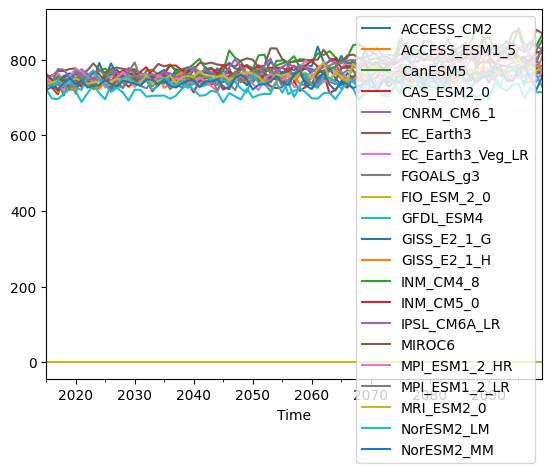

In [17]:
gcm_scen = pd.read_csv(f"../data/global_mean_series/gcm/pr/pr_ssp370_global_mean_series.txt", sep='\t', parse_dates=['Time'], index_col='Time').resample('YS').sum()
gcm_scen.plot()